In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Loading historical data
file_path = "MachineLearningRating_v3.txt"

data = pd.read_csv(file_path, sep='|', low_memory=False)

In [3]:
# Display the first 5 rows of the data
data.head(5)

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [4]:
# Calculate descriptive statistics for numerical features
num_features = ['TotalPremium', 'TotalClaims']
num_stats = data[num_features].describe()

# Display the descriptive statistics
num_stats

,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06
mean,6.190550e+01,6.486119e+01
std,2.302845e+02,2.384075e+03
min,-7.825768e+02,-1.200241e+04
25%,0.000000e+00,0.000000e+00
50%,2.178333e+00,0.000000e+00
75%,2.192982e+01,0.000000e+00
max,6.528260e+04,3.930921e+05


In [5]:
# Review the dtype of each column
data.dtypes

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [29]:
# Check for missing values
missing_values = data.isnull().sum()

# Display the missing values count
missing_values

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

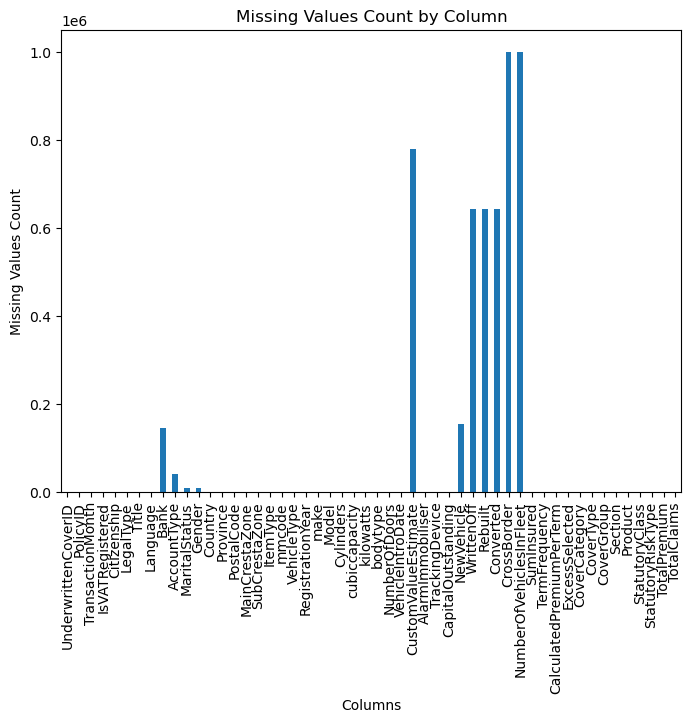

In [30]:
# Plot the missing values count
plt.figure(figsize=(8, 6))
missing_values.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.title('Missing Values Count by Column')
plt.show()

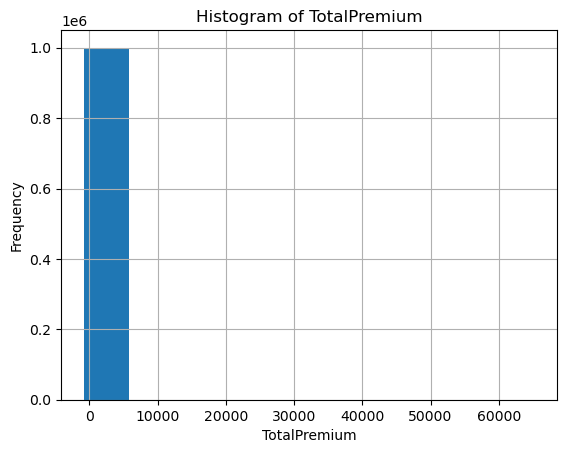

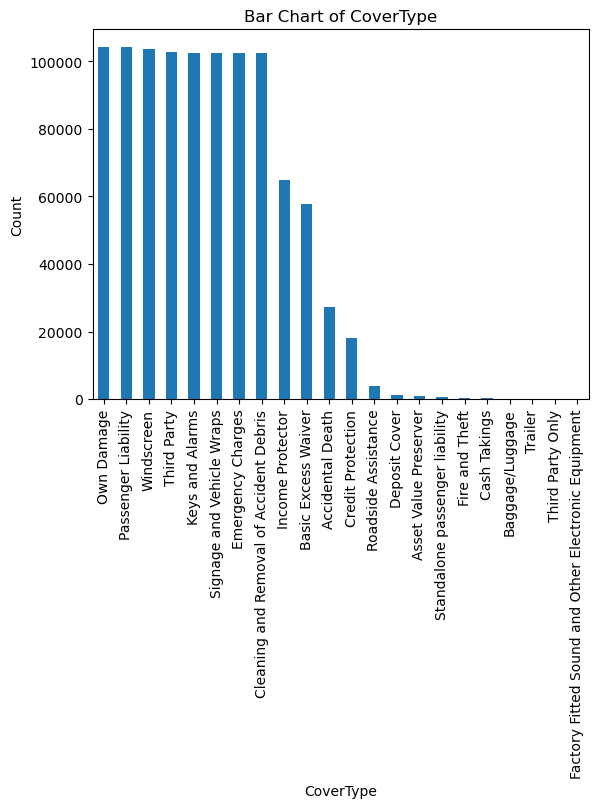

In [7]:

# Plot histograms for numerical columns
data['TotalPremium'].hist()
plt.xlabel('TotalPremium')
plt.ylabel('Frequency')
plt.title('Histogram of TotalPremium')
plt.show()

# Plot bar charts for categorical columns
data['CoverType'].value_counts().plot(kind='bar')
plt.xlabel('CoverType')
plt.ylabel('Count')
plt.title('Bar Chart of CoverType')
plt.show()

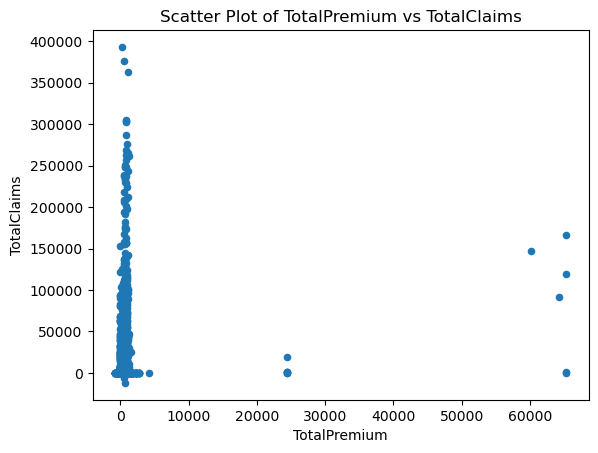

,TotalPremium,TotalClaims,PostalCode
TotalPremium,1.000000,0.121588,0.007394
TotalClaims,0.121588,1.000000,0.000412
PostalCode,0.007394,0.000412,1.000000


In [8]:
# Scatter plot of TotalPremium vs TotalClaims Multivariate Analysis
data.plot.scatter(x='TotalPremium', y='TotalClaims')
plt.xlabel('TotalPremium')
plt.ylabel('TotalClaims')
plt.title('Scatter Plot of TotalPremium vs TotalClaims')
plt.show()

# Correlation matrix
correlation_matrix = data[['TotalPremium', 'TotalClaims', 'PostalCode']].corr()
correlation_matrix

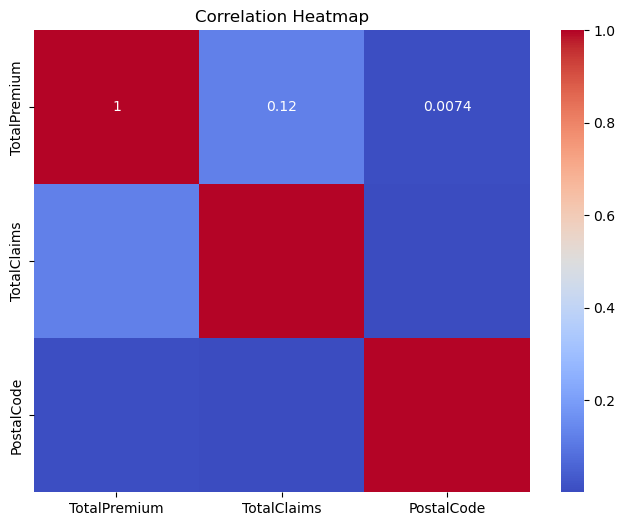

In [23]:
# Correlation matrixm Multivariate Analysis
correlation_matrix = data[['TotalPremium', 'TotalClaims', 'PostalCode']].corr()
correlation_matrix

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

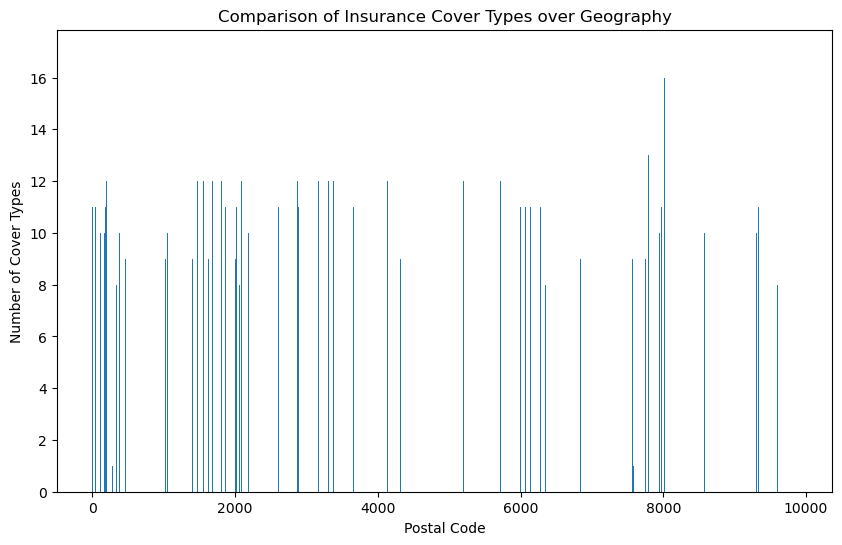

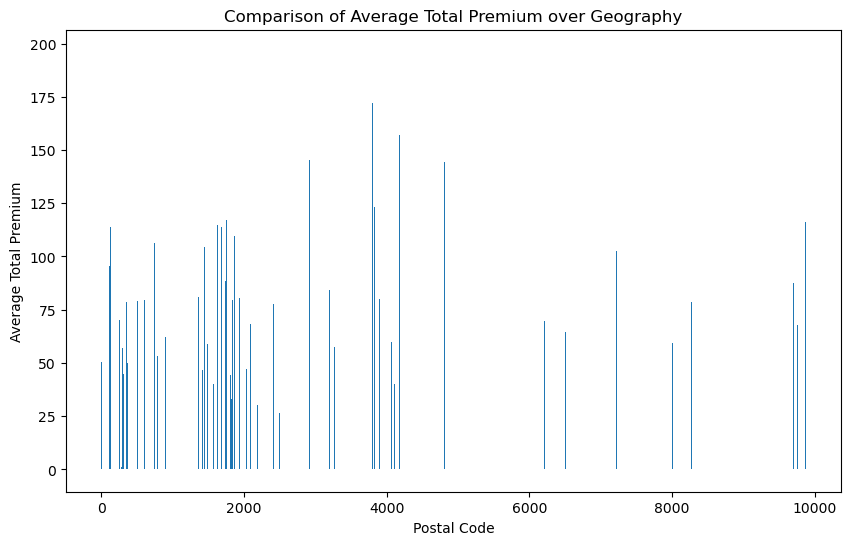

In [31]:
# Compare the change in insurance cover type, premium, auto make, etc. over geography
geography_comparison = data.groupby('PostalCode').agg({'CoverType': 'nunique', 'TotalPremium': 'mean'})

# Reset the index to make PostalCode a column instead of the index
geography_comparison = geography_comparison.reset_index()

# Plot bar charts for comparison
plt.figure(figsize=(10, 6))
plt.bar(geography_comparison['PostalCode'], geography_comparison['CoverType'])
plt.xlabel('Postal Code')
plt.ylabel('Number of Cover Types')
plt.title('Comparison of Insurance Cover Types over Geography')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(geography_comparison['PostalCode'], geography_comparison['TotalPremium'])
plt.xlabel('Postal Code')
plt.ylabel('Average Total Premium')
plt.title('Comparison of Average Total Premium over Geography')
plt.show()

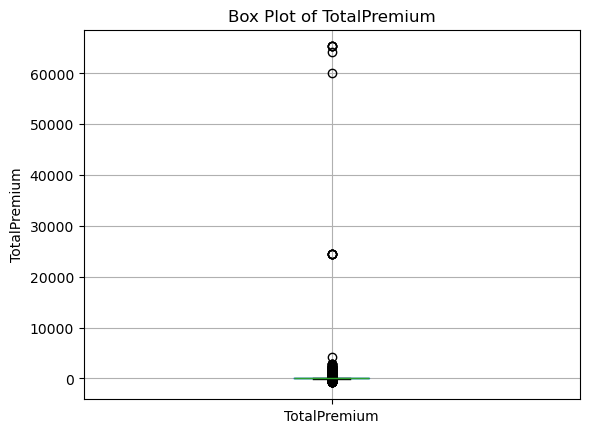

In [13]:
# Outlier Detection
#Box plot of TotalPremium
data.boxplot(column='TotalPremium')
plt.ylabel('TotalPremium')
plt.title('Box Plot of TotalPremium')
plt.show()

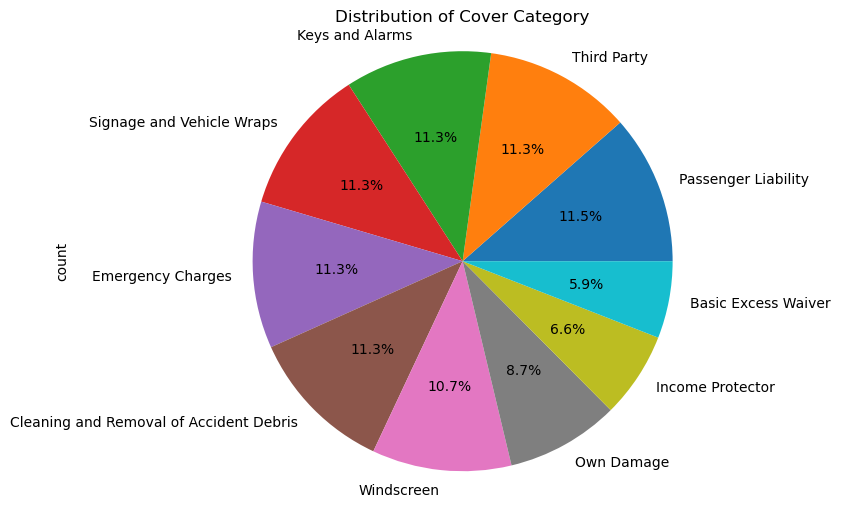

In [18]:
# Plotting 
plt.figure(figsize=(10, 6))
data['CoverCategory'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Cover Category')
plt.axis('equal')
plt.show()

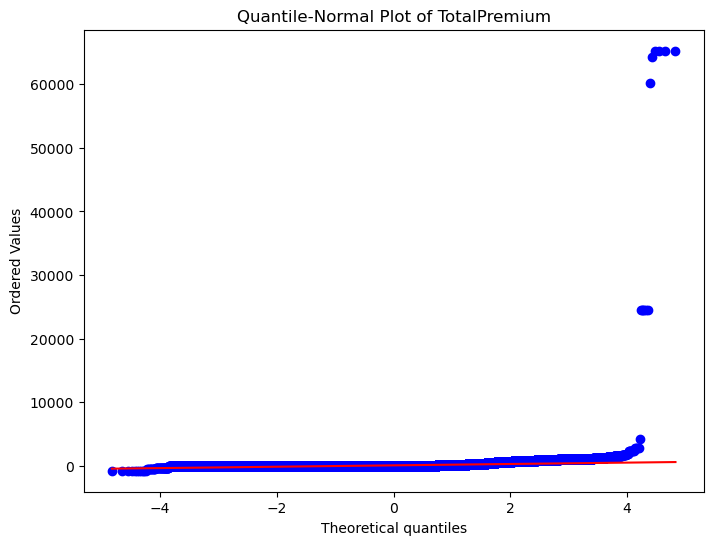

In [22]:
# Quantile-normal plots
plt.figure(figsize=(8, 6))
stats.probplot(data['TotalPremium'], dist='norm', plot=plt)
plt.title('Quantile-Normal Plot of TotalPremium')
plt.show()